# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Bachtiar Arya Habibie
- **Email:** bachtiarah73@gmail.com
- **ID Dicoding:** bachtiarah

## Menentukan Pertanyaan Bisnis


- Bagaimana  tingkat PM2.5 selama tahun 2013 sampai 2017 pada beberapa stasiun?
- Apakah ada korelasi antara tingkat PM10 dan tingkat CO
- Bagaimana perbandingan tingkat SO2 antara bulan-bulan musim panas dan musim dingin

## Import Semua Packages/Library yang Digunakan

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [31]:
path = "./data/"

filenames = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

combined_df = pd.concat((pd.read_csv(path+f) for f in filenames), ignore_index=True)

combined_df.sample(20)



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420306,34603,2017,2,9,18,5.0,30.0,2.0,10.0,300.0,72.0,0.2,1023.0,-22.1,0.0,N,3.6,Wanshouxigong
313367,32856,2016,11,28,23,78.0,115.0,25.0,81.0,2500.0,7.0,0.0,1030.4,-7.5,0.0,NNE,1.4,Shunyi
209107,33788,2017,1,6,19,221.0,221.0,18.0,116.0,4100.0,11.0,0.5,1017.5,-3.6,0.0,NNE,0.6,Gucheng
138680,33489,2016,12,25,8,114.0,133.0,25.0,77.0,2300.0,2.0,-2.6,1025.8,-7.0,0.0,ENE,1.1,Dongsi
206174,30855,2016,9,6,14,17.0,48.0,3.0,23.0,400.0,63.0,30.9,1000.3,10.8,0.0,NNE,2.3,Gucheng
208693,33374,2016,12,20,13,628.0,660.0,10.0,196.0,9900.0,9.0,1.7,1020.7,-2.8,0.0,SSW,1.5,Gucheng
45410,10347,2014,5,6,2,45.0,86.0,11.0,72.0,700.0,29.0,12.2,1004.1,-4.5,0.0,NW,1.0,Changping
216065,5682,2013,10,23,17,10.0,58.0,6.0,16.0,300.0,59.0,12.2,1012.6,-7.3,0.0,NW,2.1,Huairou
290792,10281,2014,5,3,8,33.0,66.0,9.0,52.0,500.0,8.0,16.7,1009.1,4.4,0.0,SE,1.9,Shunyi
264281,18834,2015,4,24,17,42.0,239.0,6.0,33.0,500.0,139.0,25.5,1012.1,-0.6,0.0,SW,4.3,Nongzhanguan


### Assessing Data

#### describe data
menampilkan beberapa descriptive statistic untuk melihat apakah terdapat data yang tidak normal, dikarenakan kurangnya pengetahuan dan tidak adanya informasi lebih lanjut mengenai data yang diberikan, mengenai berapa normalnya nilai untuk kadar molekul pada udara maka saya hanya fokus pada data waktu apakah terdapat anomali atau tidak

setelah dilihat ternyata nilai max dan min pada data year, month, day, dan hour. Tidak ditemukan kesalahan, semuanya memiliki nilai max dan min yang normal.

In [32]:
combined_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [33]:
combined_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


#### Identifikasi *missing value*
menampilkan apakah terdapat data yang null atau nan. ternyata terdapat banyak data yang kosong. semua data selain data waktu (year, month, day, hour) dan tempat didata diambil.

#####Data yang null dan nan adalah sebagai berikut:

| Data   |   Missing Value |
|:-------|--------------:|
| PM2.5  |          8739 |
| PM10   |          6449 |
| SO2    |          9021 |
| NO2    |         12116 |
| CO     |         20701 |
| O3     |         13277 |
| TEMP   |           398 |
| PRES   |           393 |
| DEWP   |           403 |
| RAIN   |           390 |
| wd     |          1822 |
| WSPM   |           318 |


In [34]:
combined_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

####Identifikasi duplikasi data
mengidentifikasi apakah terdapat data yang duplikat

In [35]:
print("jumlah data yang terdapat duplikasi: ",combined_df.duplicated().sum())

jumlah data yang terdapat duplikasi:  0


### Cleaning Data

####Define
menentukan rancangan tahapana yang akan dilaksanakan untuk membersihkan data yang ada

##### **Menetukan teknik untuk data kontinu**
Dikarenakan data yang digunakan merupakan data time seriez, maka tidak dapat menggunakan teknik **drop**.

Pada data time seriez juga memiliki kaitan erat berdasarkan urutan mereka, sehingga terdapat kaitan temporal satu sama lain. dikarenakan alasan tersebut metode **Imputation** juga tidak dapat digunakan pada data ini.

Dengan menggunakan **interpolasi**, kita dapat memperkirakan nilai-nilai yang hilang secara tepat di antara titik-titik data yang tersedia, dengan memperhatikan pola dan tren dalam deret waktu. MOtode ini cocok dengan data Air Quality yang memiliki pola dan tren deret waktu.

dikarenakan data Air QUality memiliki waktu yang berbeda beda maka akan kami pecah menjadi beberapa dataframe berdasarkan staiun tempat data diambil, sehingga tidak mengganggu daa di stasiun lain.

#### **Menentukan teknik untuk data kategorial**
Pada data Air Quality terdapat column WD atau wind direction, pada column ini terdapat beberapa missing data.

pada data ini saya akan mengisi data dengan missing value tersebut dengan menggunakan metode **imputation**, atau dengan mengisi data yang hilang dengan data tertentu. Pada kasus kali ini saya akan menggunakan data mode (data yang paling banyaka keluar) untuk mengisi missing value.

#### Code
Mengimplementasikan metode yang dipilih pada proses define kepada kode python

#####**memecah data**

Data dibagi menjadi 12 subset berdasarkan nama stasiun tempat data diambil.

In [36]:
stations = combined_df['station'].unique()
stations

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [37]:
stations = combined_df['station'].unique()

station_data = {}

for station in stations:
    station_data[station] = combined_df[combined_df['station'] == station]

for station, df in station_data.items():
    print(f"{station} DataFrame:")
    print(df.head())

print("jumlah subdata: ", len(station_data))

Aotizhongxin DataFrame:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
Changping DataFrame:
       No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
35064   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
35065   2  2013      3    1     1   

##### **mengambil semua kolom yang memiliki missing value**

In [38]:
missing_values_per_column = combined_df.isna().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
columns_with_missing_values_names = columns_with_missing_values.index.tolist()

for i in columns_with_missing_values_names:
  print(i)

PM2.5
PM10
SO2
NO2
CO
O3
TEMP
PRES
DEWP
RAIN
wd
WSPM


#####**Implementasi Interpolasi**

Mengimplementasikan metode Interpolasi kepada missing value yang ada di data Air Quality menggunakan library pandas untuk semua sub data

In [39]:
for station, df in station_data.items():  # Menggunakan metode .items() untuk mengakses kunci dan nilai
  for column in columns_with_missing_values_names:
    df[column].interpolate(method='linear', limit_direction='forward', inplace=True)


C:\Users\bacht\AppData\Local\Temp\ipykernel_26372\1091396563.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction='forward', inplace=True)
C:\Users\bacht\AppData\Local\Temp\ipykernel_26372\1091396563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].interpolate(method='linear'

#####**Implementasi Imputation**
Mengimplementasikan metode Imputation kepada missing value pada data categorial(wd) yang ada di data Air Quality menggunakna library pandas

In [40]:
for station, df in station_data.items():
  mode_values = df['wd'].mode()

  mode_value = mode_values[0]  # Extract the first mode value

  df['wd'].fillna(value=mode_value, inplace=True)

  print(f"Mode for station {station}: {mode_value}")

Mode for station Aotizhongxin: NE
Mode for station Changping: NNW
Mode for station Dingling: NNW
Mode for station Dongsi: ENE
Mode for station Guanyuan: NE
Mode for station Gucheng: N
Mode for station Huairou: NW
Mode for station Nongzhanguan: ENE
Mode for station Shunyi: NNE
Mode for station Tiantan: ENE
Mode for station Wanliu: NE
Mode for station Wanshouxigong: NE


C:\Users\bacht\AppData\Local\Temp\ipykernel_26372\171583522.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(value=mode_value, inplace=True)
C:\Users\bacht\AppData\Local\Temp\ipykernel_26372\171583522.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wd'].fillna(value=mode_value, inplace=True)


####Test
Memeriksa apakah data sudah bersih dari data yang rusak atau kotor

In [41]:
for station, df in station_data.items():
    print(f"{station} DataFrame:")
    print(df.isna().sum())

Aotizhongxin DataFrame:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
Changping DataFrame:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
Dingling DataFrame:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
Dongsi DataFrame:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP   

## Exploratory Data Analysis (EDA)

### Explore data Air Quality

In [42]:
for station, df in station_data.items():
  print(f"{station} DataFrame:")
  print(df.sample(5))

station_data['Aotizhongxin'].sample(5)

Aotizhongxin DataFrame:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
1321    1322  2013      4   25     1   10.0   30.0   4.0   50.0   400.0  30.0   
31515  31516  2016     10    4     3   26.0   43.0   2.0   27.0   600.0  44.0   
19222  19223  2015      5   10    22   37.0   37.0   3.0   61.0  1600.0  24.0   
15169  15170  2014     11   23     1   85.0  142.0  19.0  100.0  1900.0   2.0   
22473  22474  2015      9   23     9   18.0   30.0   2.0   32.0   600.0  41.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
1321   11.3  1007.4  -2.2   0.0   NE   1.5  Aotizhongxin  
31515  19.1  1011.6  12.4   0.0    E   2.9  Aotizhongxin  
19222   9.7  1011.0   8.1   0.0   NW   3.0  Aotizhongxin  
15169   4.0  1030.0  -5.0   0.0  ENE   1.3  Aotizhongxin  
22473  19.2  1006.8  14.0   0.0    N   2.1  Aotizhongxin  
Changping DataFrame:
          No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO     O3  \
60092  25029  2016      1    7   

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
14433,14434,2014,10,23,9,123.0,177.0,7.0,79.0,1000.0,2.0,13.5,1010.8,8.3,0.0,NE,1.9,Aotizhongxin
18462,18463,2015,4,9,6,138.0,148.0,11.0,83.0,1400.0,4.0,3.0,1016.9,0.2,0.0,E,0.9,Aotizhongxin
8748,8749,2014,2,28,12,87.0,98.0,37.0,67.0,1700.0,3.0,3.8,1020.1,-3.0,0.0,S,1.6,Aotizhongxin
7468,7469,2014,1,6,4,119.0,125.0,35.0,60.5,2000.0,1.0,-0.4,1020.9,-3.4,0.0,SW,3.0,Aotizhongxin
26134,26135,2016,2,22,22,28.0,61.0,12.0,22.0,500.0,62.0,1.5,1030.6,-15.5,0.0,NNE,3.7,Aotizhongxin


### Explore Quality Air each year

In [43]:
clean_combined_df = pd.concat(station_data.values(), ignore_index=True)
clean_combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])
years = clean_combined_df['year'].unique()

quality_air_eachyear = {}
for year in years:
  tdf = clean_combined_df[clean_combined_df['year'] == year]
  print(f"data pm2.5 pada tahun: {year}")
  print(tdf.sample(5))
  quality_air_eachyear[year] = tdf




data pm2.5 pada tahun: 2013
          No  year  month  day  hour  PM2.5   PM10   SO2   NO2           CO  \
217500  7117  2013     12   22    12   56.0   56.0  73.0  46.0  1400.000000   
141711  1456  2013      4   30    15   21.0   47.0   7.0  29.0   400.000000   
286273  5762  2013     10   27     1  106.0  151.0   1.0  82.0  1400.000000   
181575  6256  2013     11   16    15   11.0   36.0   5.0   8.0   705.263158   
281645  1134  2013      4   17     5   55.0   57.0  16.0  39.0   800.000000   

              O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  \
217500   35.0000   1.3  1021.9 -16.6   0.0    E   0.8   Huairou   
141711  124.0000  29.0  1005.7  -4.5   0.0  NNW   1.5  Guanyuan   
286273    2.3562   4.3  1015.7   2.8   0.0  ENE   0.9    Shunyi   
181575   68.9724  10.5  1013.3 -11.6   0.0    W   1.7   Gucheng   
281645   47.0000   8.2  1009.1   0.7   0.0  ESE   1.5    Shunyi   

                  datetime  
217500 2013-12-22 12:00:00  
141711 2013-04-30 15:00:00  
286273 

### eksplor mean PM2.5 each station

In [44]:
average_pm25_each_station = clean_combined_df.groupby('station')['PM2.5'].mean()

average_pm25_each_station


station
Aotizhongxin     82.540623
Changping        70.986438
Dingling         66.845557
Dongsi           86.144243
Guanyuan         82.897522
Gucheng          84.074802
Huairou          69.501747
Nongzhanguan     85.079472
Shunyi           79.437962
Tiantan          82.033097
Wanliu           83.467612
Wanshouxigong    85.067548
Name: PM2.5, dtype: float64

####eksplor PM10 and CO

In [45]:
clean_combined_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420746.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.601416,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.171276,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,NaN


In [46]:
mean_PM10_monthly = clean_combined_df.groupby(['year', 'month'])['PM10'].mean()
mean_CO_monthly = clean_combined_df.groupby(['year', 'month'])['CO'].mean()

print(mean_PM10_monthly)
print(mean_CO_monthly)

year  month
2013  3        130.249832
      4         95.931510
      5        134.408462
      6        115.859546
      7         76.424118
      8         77.461302
      9         96.402862
      10       112.675042
      11        96.244676
      12        96.066980
2014  1        123.645105
      2        156.681982
      3        136.205645
      4        144.124306
      5        116.993721
      6         74.037310
      7        109.784067
      8         85.454615
      9         90.316042
      10       146.505544
      11       125.516979
      12        95.371698
2015  1        113.719538
      2        120.783495
      3        146.016252
      4        115.078432
      5         95.617059
      6         80.524329
      7         75.412444
      8         64.862455
      9         63.247743
      10        89.317148
      11       120.251620
      12       159.541611
2016  1         82.528674
      2         57.133800
      3        134.401938
      4        114.085648


###Eksplor data SO2 untuk bulan bulan musim panas dan dingin

In [47]:
mean_SO2 = clean_combined_df.groupby(['year', 'month'])['SO2'].mean()
mean_SO2_dict = mean_SO2.to_dict()

mean_SO2_dict


{(2013, 3): 38.530269982078856,
 (2013, 4): 20.686865842151676,
 (2013, 5): 26.37684125490698,
 (2013, 6): 13.607298780864198,
 (2013, 7): 7.273532110588412,
 (2013, 8): 6.903813513664875,
 (2013, 9): 10.196775411522633,
 (2013, 10): 15.604847944046197,
 (2013, 11): 21.838826296296297,
 (2013, 12): 38.5278829749104,
 (2014, 1): 53.39191308243728,
 (2014, 2): 57.92094494047619,
 (2014, 3): 34.75011200716846,
 (2014, 4): 17.128935185185185,
 (2014, 5): 15.162549472063867,
 (2014, 6): 6.2812220270154855,
 (2014, 7): 6.5418458781362006,
 (2014, 8): 5.377576164874552,
 (2014, 9): 6.684780092592592,
 (2014, 10): 8.910338261648745,
 (2014, 11): 16.44337962962963,
 (2014, 12): 28.177658303464757,
 (2015, 1): 34.2585592144564,
 (2015, 2): 26.66371527777778,
 (2015, 3): 20.7919186827957,
 (2015, 4): 9.28534722222222,
 (2015, 5): 8.722278225806452,
 (2015, 6): 6.707060185185185,
 (2015, 7): 4.794186827956989,
 (2015, 8): 3.594590053763441,
 (2015, 9): 4.894155092592593,
 (2015, 10): 5.85422267025

In [48]:
winter_month = [1,2,11,12]
summer_month = [6,7,8,9]

summer_SO2 = {}
winter_SO2 = {}

for key, value in mean_SO2_dict.items():
    if key[1] in summer_month:
        summer_SO2[key] = value
    elif key[1] in winter_month:
        winter_SO2[key] = value

print(summer_SO2)
print(len(summer_SO2))
print(winter_SO2)
print(len(winter_SO2))


{(2013, 6): 13.607298780864198, (2013, 7): 7.273532110588412, (2013, 8): 6.903813513664875, (2013, 9): 10.196775411522633, (2014, 6): 6.2812220270154855, (2014, 7): 6.5418458781362006, (2014, 8): 5.377576164874552, (2014, 9): 6.684780092592592, (2015, 6): 6.707060185185185, (2015, 7): 4.794186827956989, (2015, 8): 3.594590053763441, (2015, 9): 4.894155092592593, (2016, 6): 5.0187731481481475, (2016, 7): 3.47793458781362, (2016, 8): 2.8578629032258065, (2016, 9): 3.384548611111111}
16
{(2013, 11): 21.838826296296297, (2013, 12): 38.5278829749104, (2014, 1): 53.39191308243728, (2014, 2): 57.92094494047619, (2014, 11): 16.44337962962963, (2014, 12): 28.177658303464757, (2015, 1): 34.2585592144564, (2015, 2): 26.66371527777778, (2015, 11): 11.772222222222222, (2015, 12): 19.31423611111111, (2016, 1): 19.873823924731184, (2016, 2): 14.570821360153257, (2016, 11): 11.118888888888888, (2016, 12): 17.04945116487455, (2017, 1): 18.554995519713263, (2017, 2): 17.608506944444443}
16


## Visualization & Explanatory Analysis

###Bagaimana  tingkat PM2.5 selama tahun 2013 sampai 2017 pada beberapa stasiun?

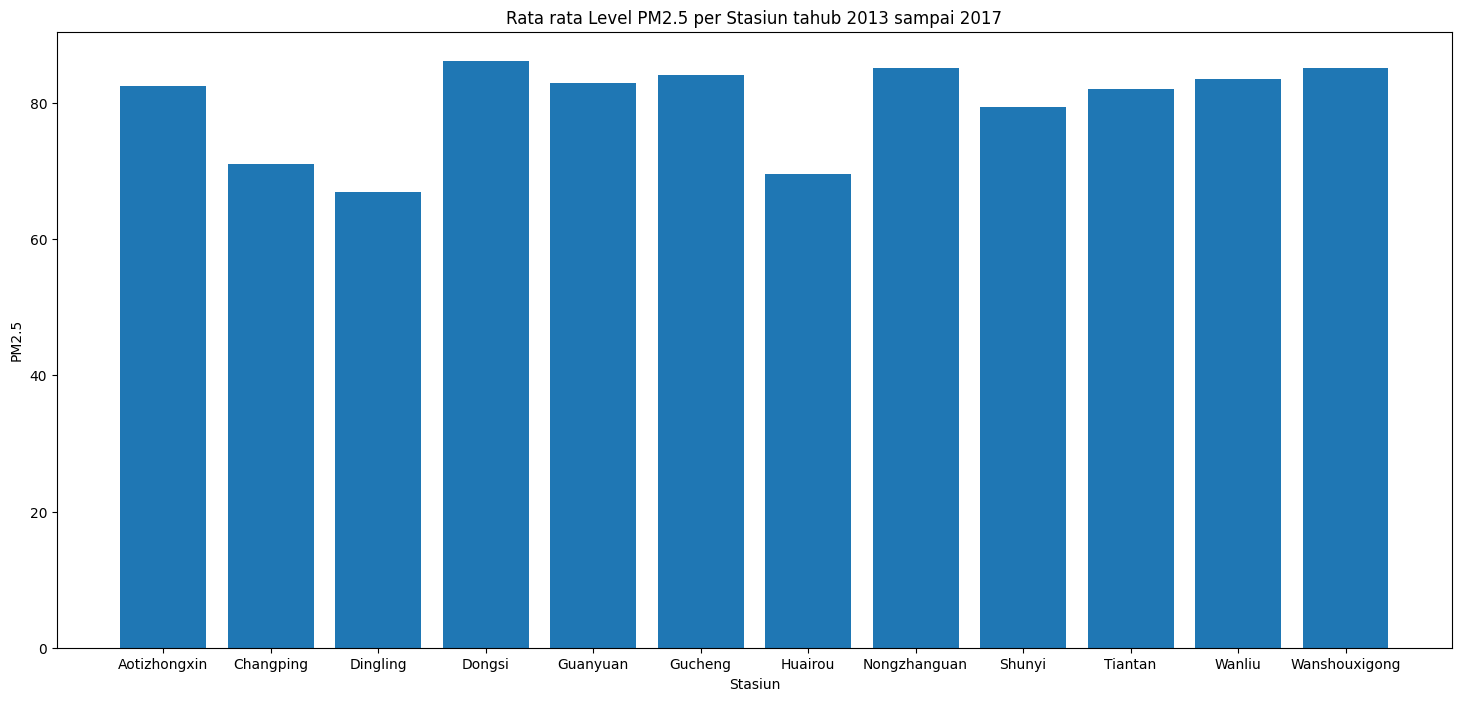

In [49]:
plt.figure(figsize=(18, 8))
plt.bar(x=average_pm25_each_station.keys(), height=average_pm25_each_station.values,)
plt.xlabel('Stasiun')
plt.ylabel('PM2.5')
plt.title('Rata rata Level PM2.5 per Stasiun tahub 2013 sampai 2017')
plt.show()

###Apakah ada korelasi antara tingkat PM10 dan tingkat CO

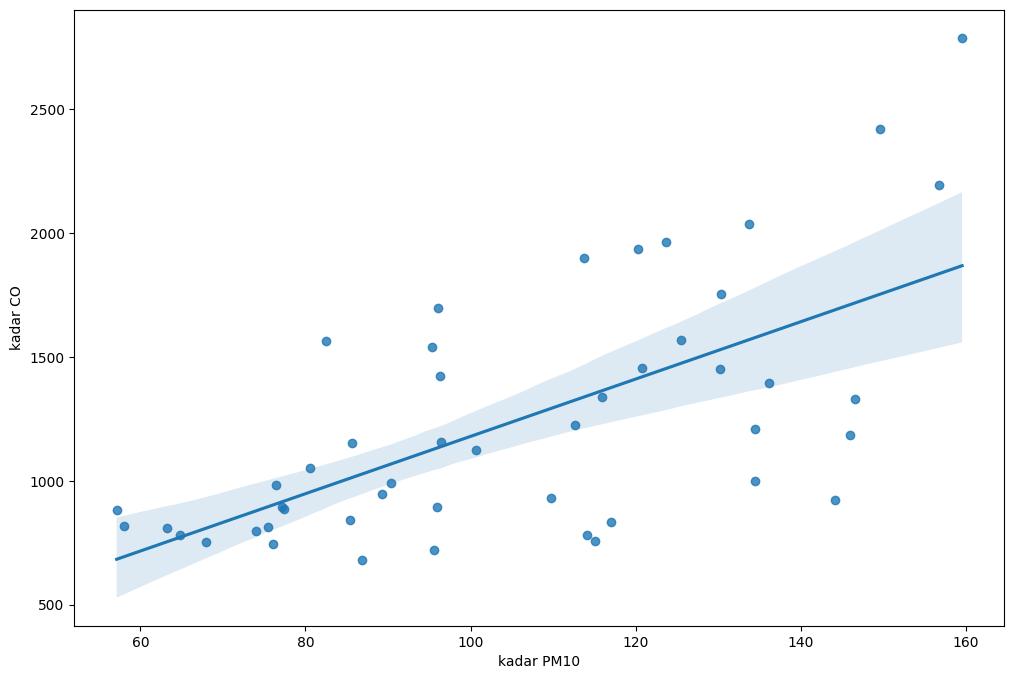

In [50]:

plt.figure(figsize=(12,8))
sns.regplot(x=mean_PM10_monthly.values,y=mean_CO_monthly.values)
plt.xlabel("kadar PM10")
plt.ylabel("kadar CO")

plt.show()

###Bagaimana perbandingan tingkat SO2 antara bulan-bulan musim panas dan musim dingin

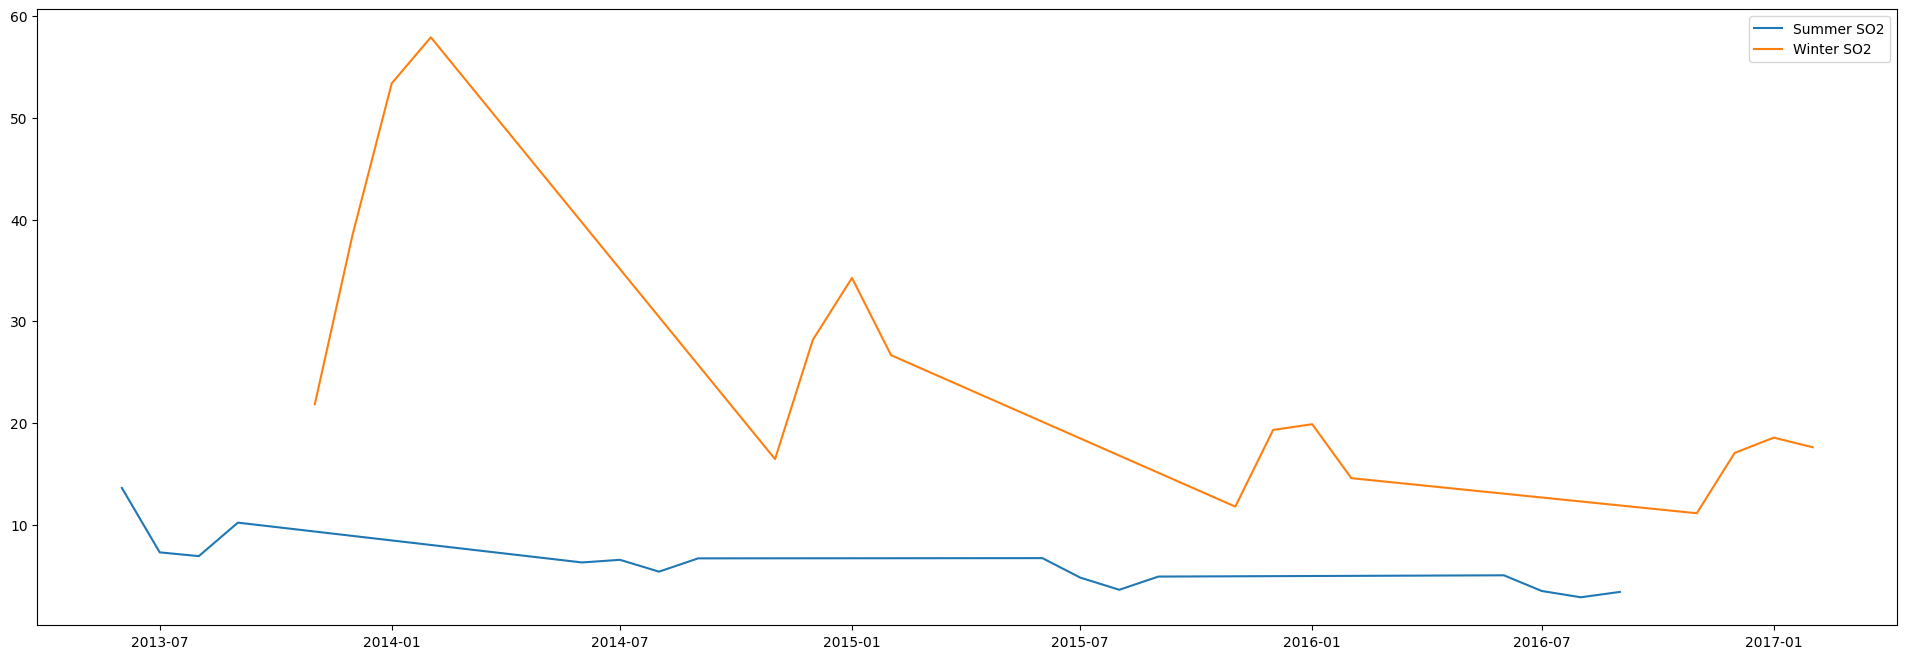

In [51]:
# Convert the keys to datetime objects
summer_dates = [datetime.datetime(year, month, 1) for year, month in summer_SO2.keys()]
winter_dates = [datetime.datetime(year, month, 1) for year, month in winter_SO2.keys()]

# Create a new figure
plt.figure(figsize=(24,8))

# Plot summer_SO2 and winter_SO2
plt.plot(summer_dates, list(summer_SO2.values()), label='Summer SO2')
plt.plot(winter_dates, list(winter_SO2.values()), label='Winter SO2')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Conclusion

- Tingkat PM2.5 pada setiap stasiun relatif mirip. Namun terdapat beberap stasiun memiliki kadar MP2.5 yang lebih sedikit seperti Dingling, dan yang memiliki kadar MP2.5 lebih banyak seperti stasiun Dongsi
- Tingkat PM10 dan tingkat CO2 memiliki korelasi yang sangat signifikan. Hal ini dibuktikan dengan terbentuknya garis korelasi yang menunjukan confidence level dari hasil regression tersebut.
- Pada data visualisasi perbandingan SO2 antara bulan bulan musim panas dan musim dingin menunjukan bahwa polusi pada musim panas memiliki kadar SO2 lebih rendah jika dibandingkan dengan kadar SO2 pada musim dingin

##Extract Maindata

In [52]:
clean_combined_df.to_csv("main_data.csv", index=False)